# SciViz!

## 2. Using yt

In [1]:
import yt

We'll use a dataset originally from the yt hub: http://yt-project.org/data/

Specifically, we'll use the IsolatedGalaxy dataset: http://yt-project.org/data/IsolatedGalaxy.tar.gz

Now, lets grab a dataset & upload it.  Here's where mine is stored (in data):

In [2]:
ds = yt.load("/Users/jnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2022-08-17 18:28:18,151 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2022-08-17 18:28:18,152 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-08-17 18:28:18,153 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-17 18:28:18,154 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-17 18:28:18,154 Parameters: cosmological_simulation   = 0


Print out various stats of this dataset:

In [3]:
ds.print_stats()

Parsing Hierarchy : 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 15467.24it/s]
yt : [INFO     ] 2022-08-17 18:28:19,536 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc Mpc
	Width: 1.221e+02 pc pc
	Width: 2.518e+07 AU AU
	Width: 3.767e+20 cm cm


This is basically telling us something about the number of data points in the dataset. Don't worry if you don't know what levels, grids or cells are at this point we'll get to it later.

Same thing with field list, its cool if some of these look less familiar then others:

In [4]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [5]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

This is a 3D simululation of a galaxy, lets check out some stats about the box:

In [6]:
ds.domain_right_edge, ds.domain_left_edge

(unyt_array([1., 1., 1.], 'code_length'),
 unyt_array([0., 0., 0.], 'code_length'))

What this is saying is the box goes from (0,0,0) to (1,1,1) in "code_length" units.  Basically, this is just a normalized box.

You can also do fun things like print out max & min densities:

In [7]:
ds.r[:].max("density"), ds.r[:].min("density")

(unyt_quantity(7.73426504e-24, 'g/cm**3'),
 unyt_quantity(8.47293751e-32, 'g/cm**3'))

The above is for the whole box.

We can also ask where the maximum density is in this simulation box:

In [8]:
ds.r[:].argmax("density")

(unyt_quantity(0.50408936, 'code_length'),
 unyt_quantity(0.49981689, 'code_length'),
 unyt_quantity(0.50018311, 'code_length'))

So this gives us x/y/z positions for where the maximum density is.

Ok, lets make a quick plot 1/2 down the z-direction. 

yt : [INFO     ] 2022-08-17 18:28:24,420 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:28:24,422 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:28:24,426 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:28:24,538 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



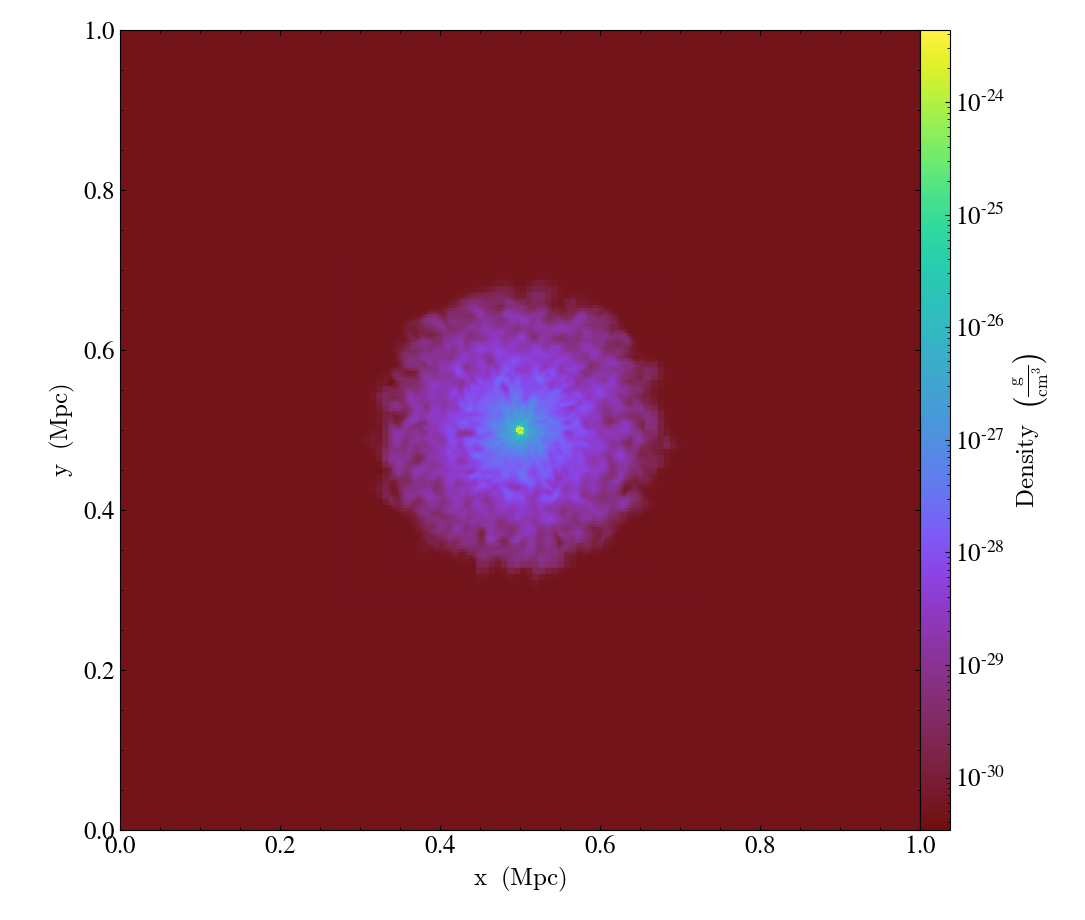

In [9]:
# if the plot is too big for class try:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]


p = ds.r[:, :, 0.5].plot("density")

Let's zoom:

yt : [INFO     ] 2022-08-17 18:28:25,106 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:28:25,115 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



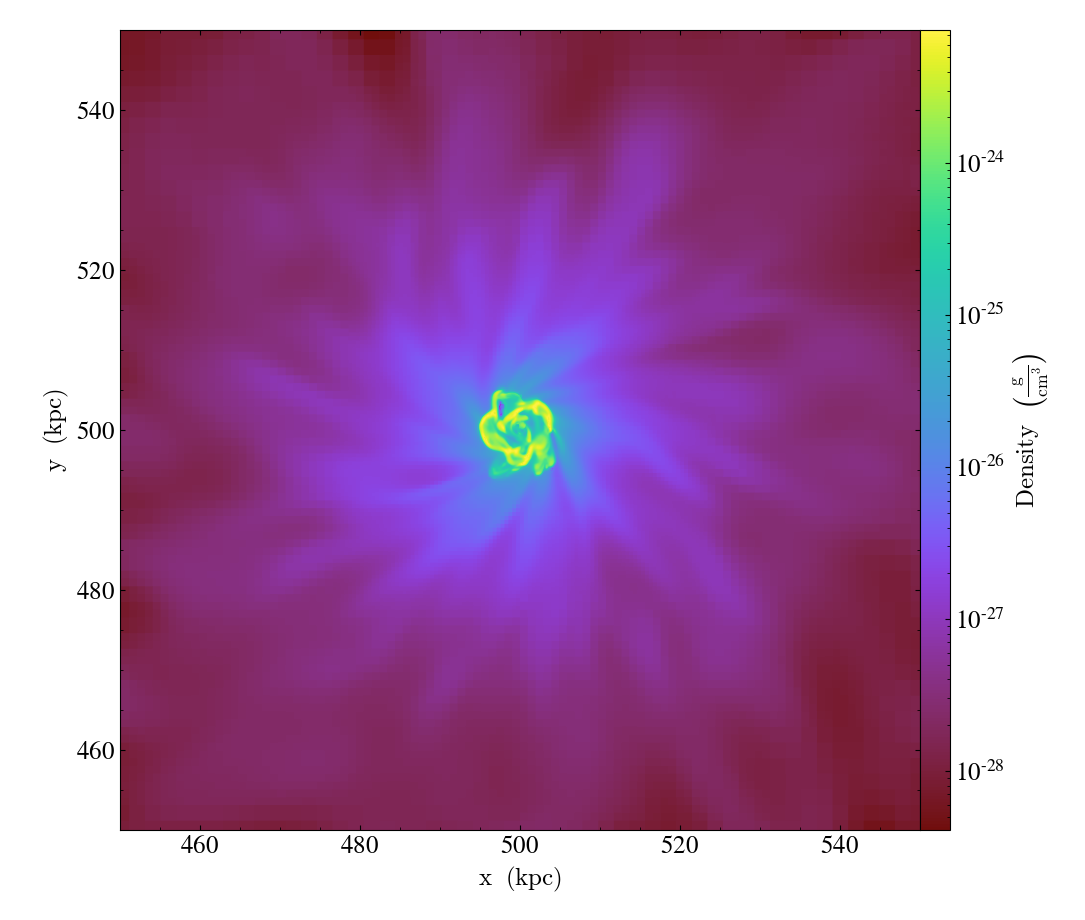

In [10]:
p.zoom(10)

So, unless you're an astronomer you might be a little confused about these "kpc" units. But yt allows us to change them!  Behold cool yt units things:

In [11]:
yt.units.kpc.get_cgs_equivalent()

cm

So we have now changed these weird kpc units.

yt also can do cool things with units like, `yt.units` figures out some math stuff like, making things into cubed cm:

In [12]:
(yt.units.kpc**3).get_cgs_equivalent()

cm**3

So let's set some units of our plot!  Let's change the units of density from $g/cm^3$ to $kg/m^3$


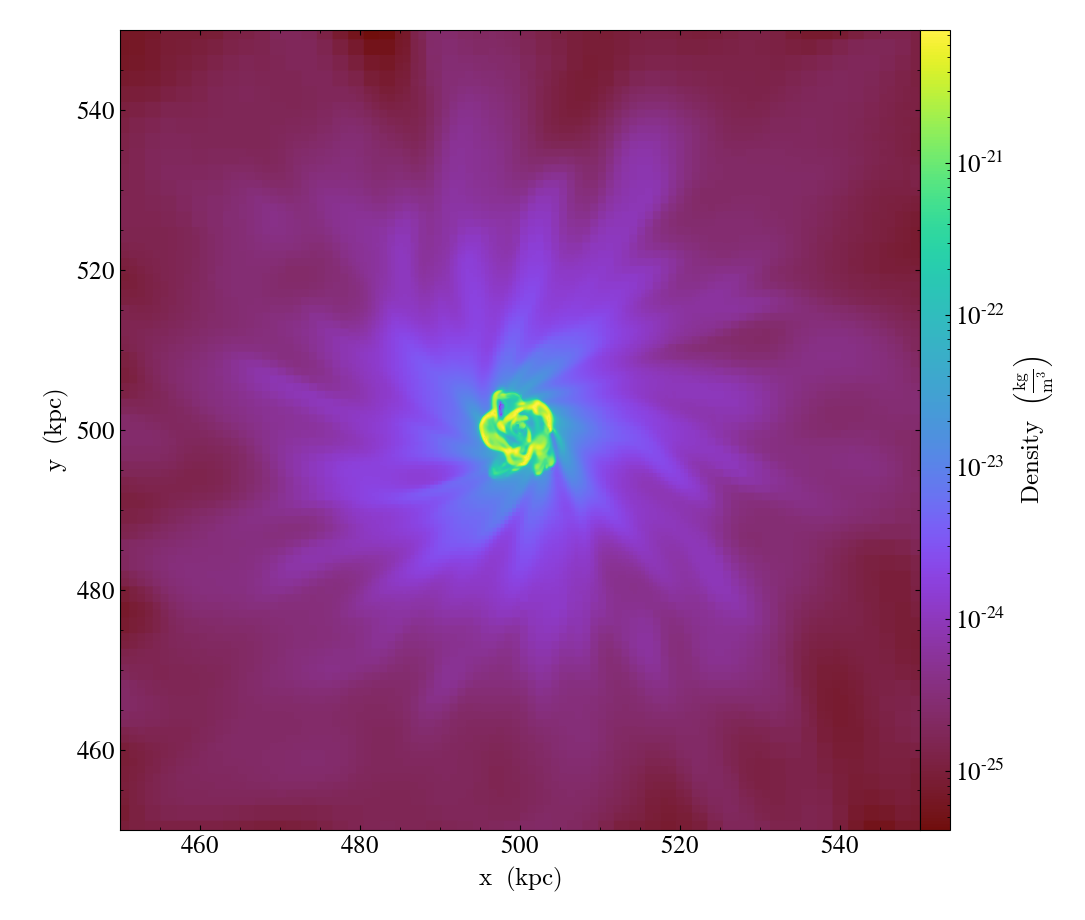

In [13]:
p.set_unit("density","kg/m**3")

We can also include annotations on this plot:


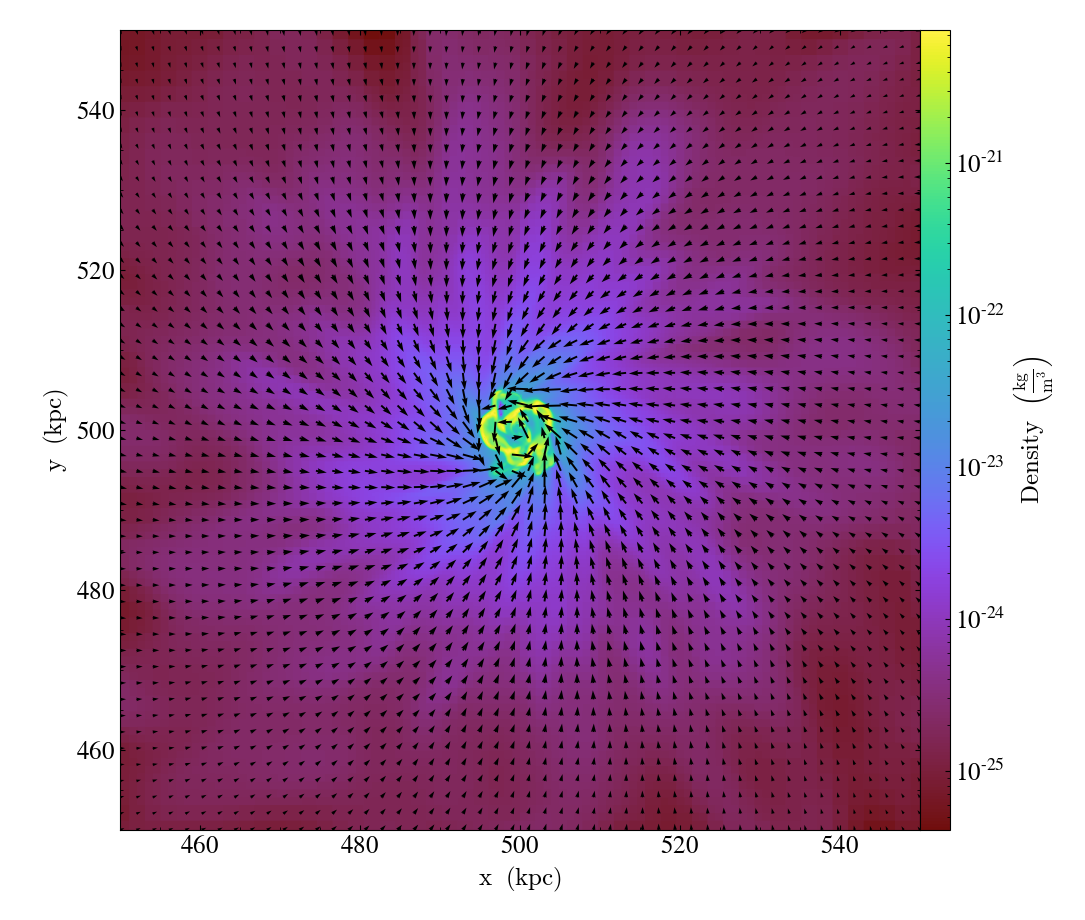

In [14]:
p.annotate_velocity()

This shows how material is moving in this simulation this is shown with velocity vectors.

We can combine some of our coding around finding max values of density and combine with some region plots.

Let's project the maximum density along the z axis i.e. lets make a plot of the maximum density along the z-axis of our plot:

yt : [INFO     ] 2022-08-17 18:28:28,249 Projection completed
yt : [INFO     ] 2022-08-17 18:28:28,250 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:28:28,251 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:28:28,252 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



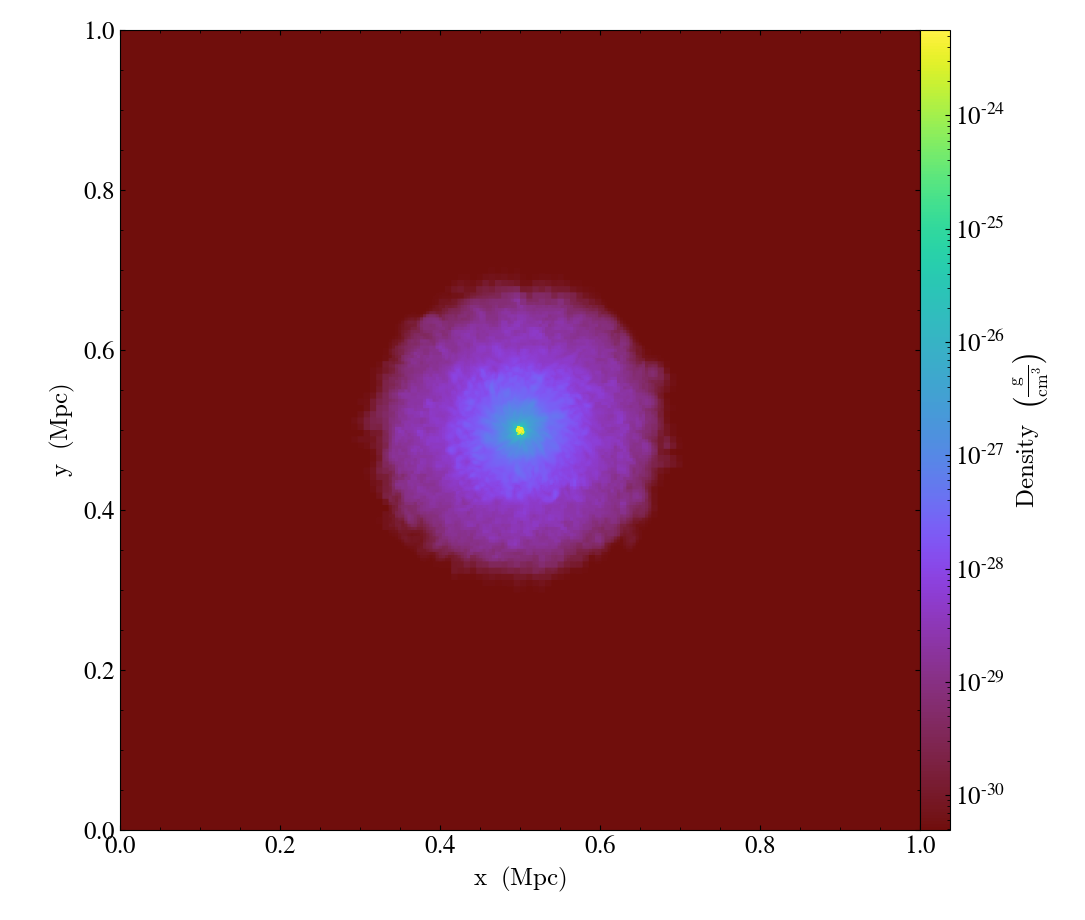

In [15]:
p2 = ds.r[:].max("density", axis="z").plot()

We can zoom this as well:


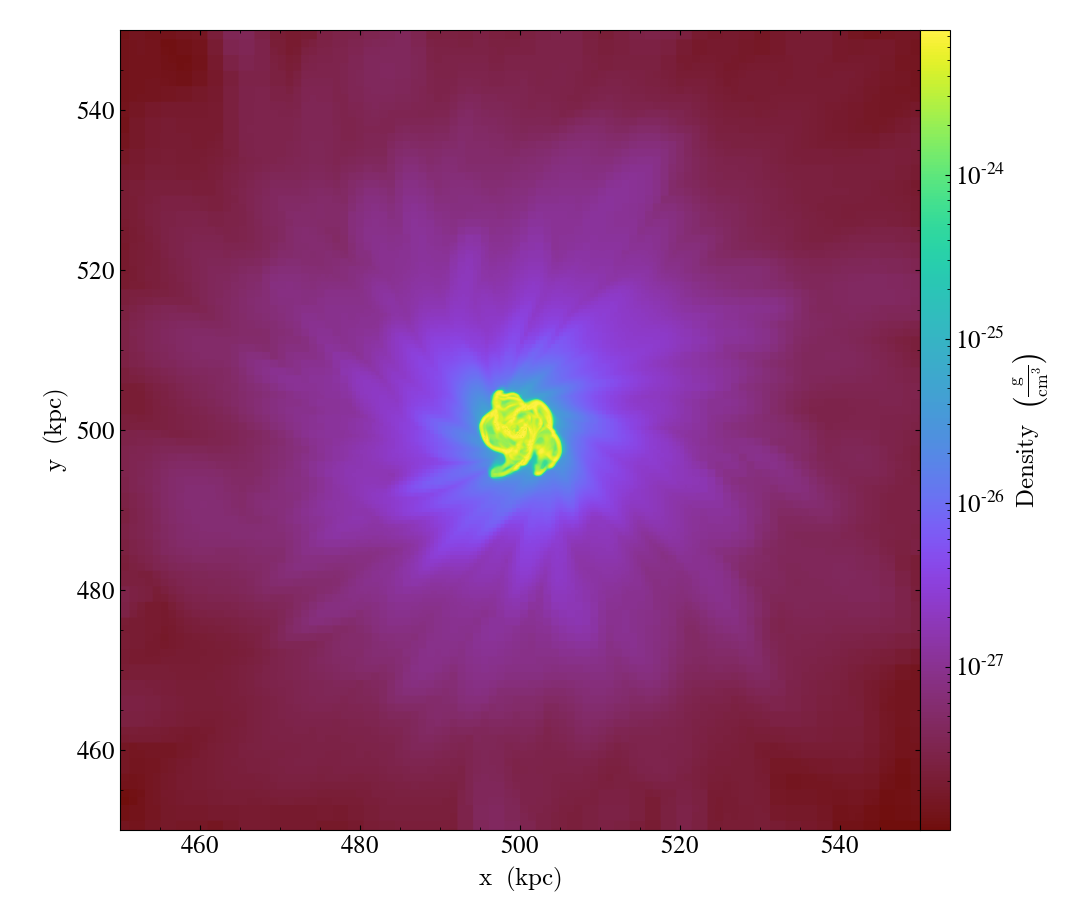

In [16]:
p2.zoom(10)

If we scroll back up we can see that there is indeed a different between this and our slice plot.  Here, we are much more "smeared" since we're picking only the max density $\rightarrow$ everything looks brighter.

We can also do plots based on region selection but over specific values of z (and x & y). If we recall our box goes from 0$\rightarrow$1 in each x/y/z direction, we can plot a zoom in like so:

yt : [INFO     ] 2022-08-17 18:28:29,135 Projection completed
yt : [INFO     ] 2022-08-17 18:28:29,136 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:29,137 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:29,138 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



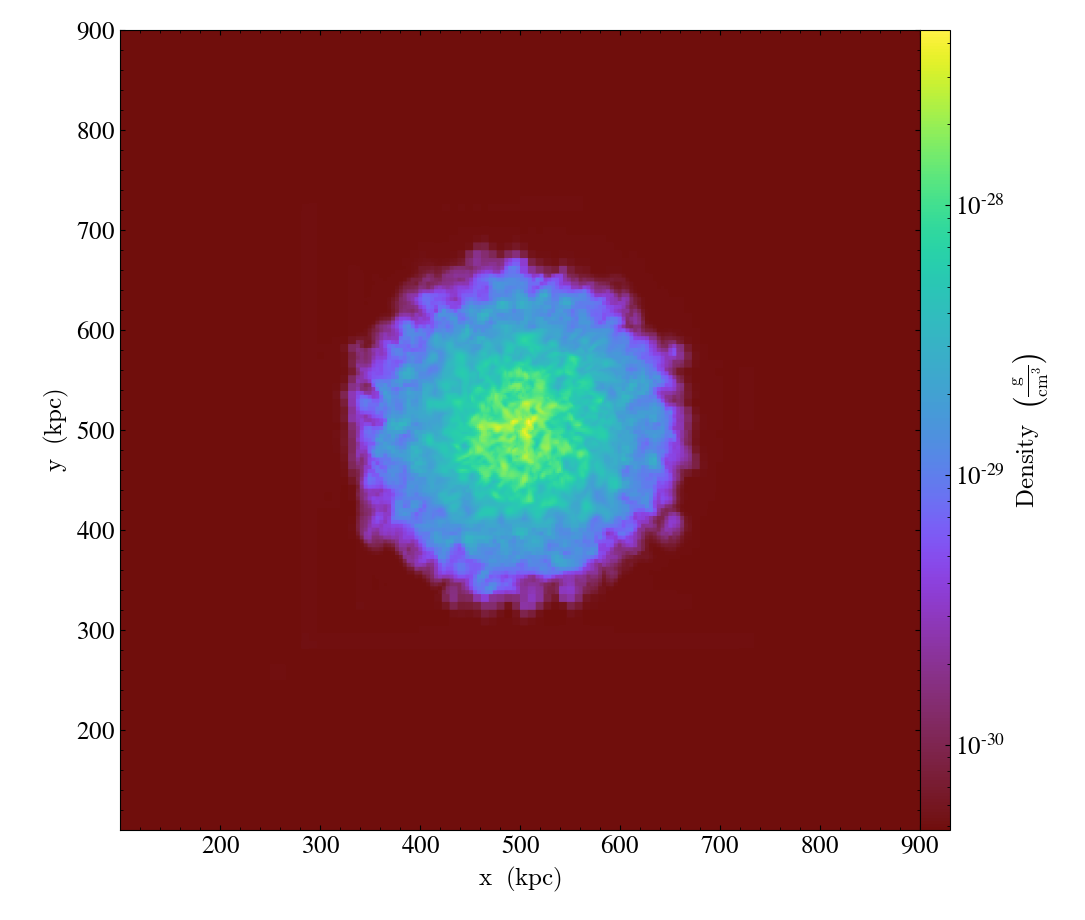

In [17]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].max("density", axis="z").plot()

So, this shows the maximum density but only in a thin slice of the z-axis which is offset from the center.

Since the galaxy lives at the center, and is the highest density gas region, it makes sense that our densities are lower and our features look different -- more "fuzzy ball" outside of the galaxy then gas flowing onto a galaxy disk.

Let's redo the same plot but for the temperature of the gas:

yt : [INFO     ] 2022-08-17 18:28:29,529 Projection completed
yt : [INFO     ] 2022-08-17 18:28:29,530 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:29,530 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:29,532 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



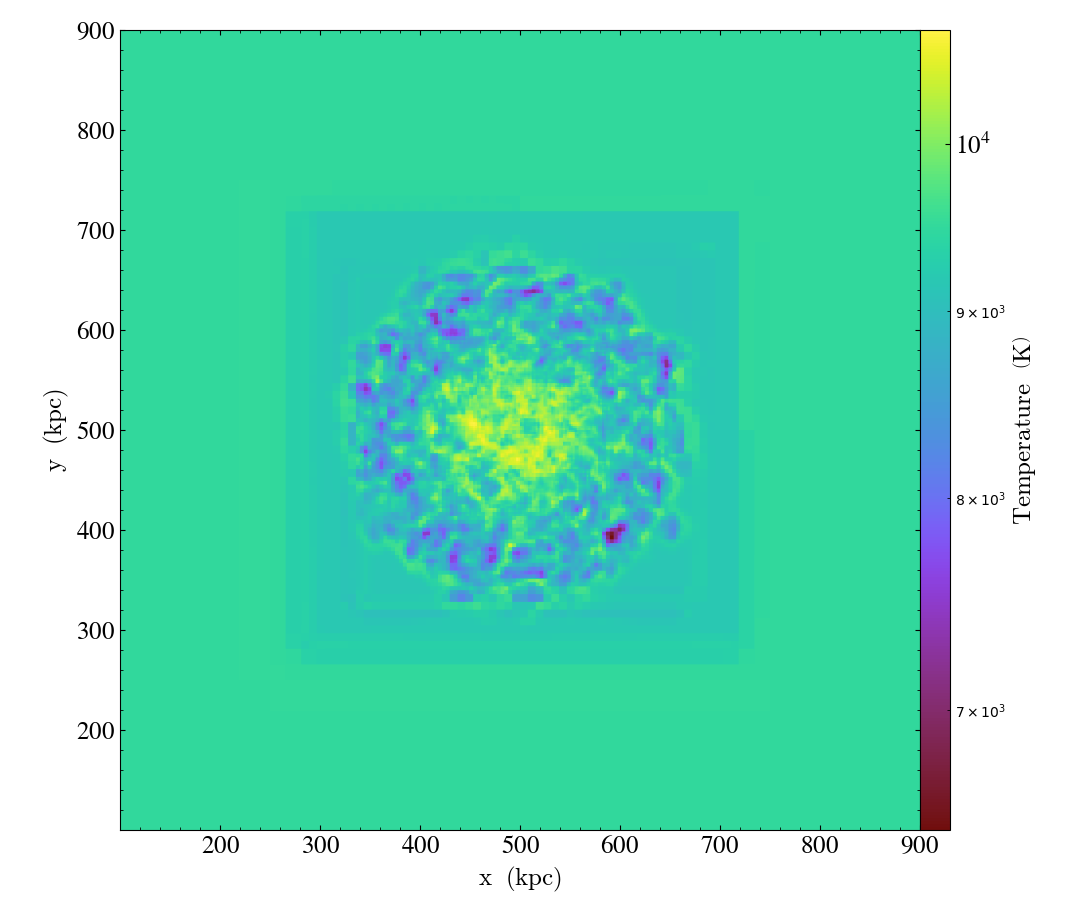

In [18]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].mean("temperature", axis="z").plot()

We might want to highlight the temperature of the most dense regions.  Why?  Well maybe we want to, instead of depicting the straight temperature, we want to depict the temperature of the *majority of the gas*. We can do this by specifying a "weight" in our projection:

yt : [INFO     ] 2022-08-17 18:28:30,011 Projection completed
yt : [INFO     ] 2022-08-17 18:28:30,012 xlim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:30,012 ylim = 0.100000 0.900000
yt : [INFO     ] 2022-08-17 18:28:30,014 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



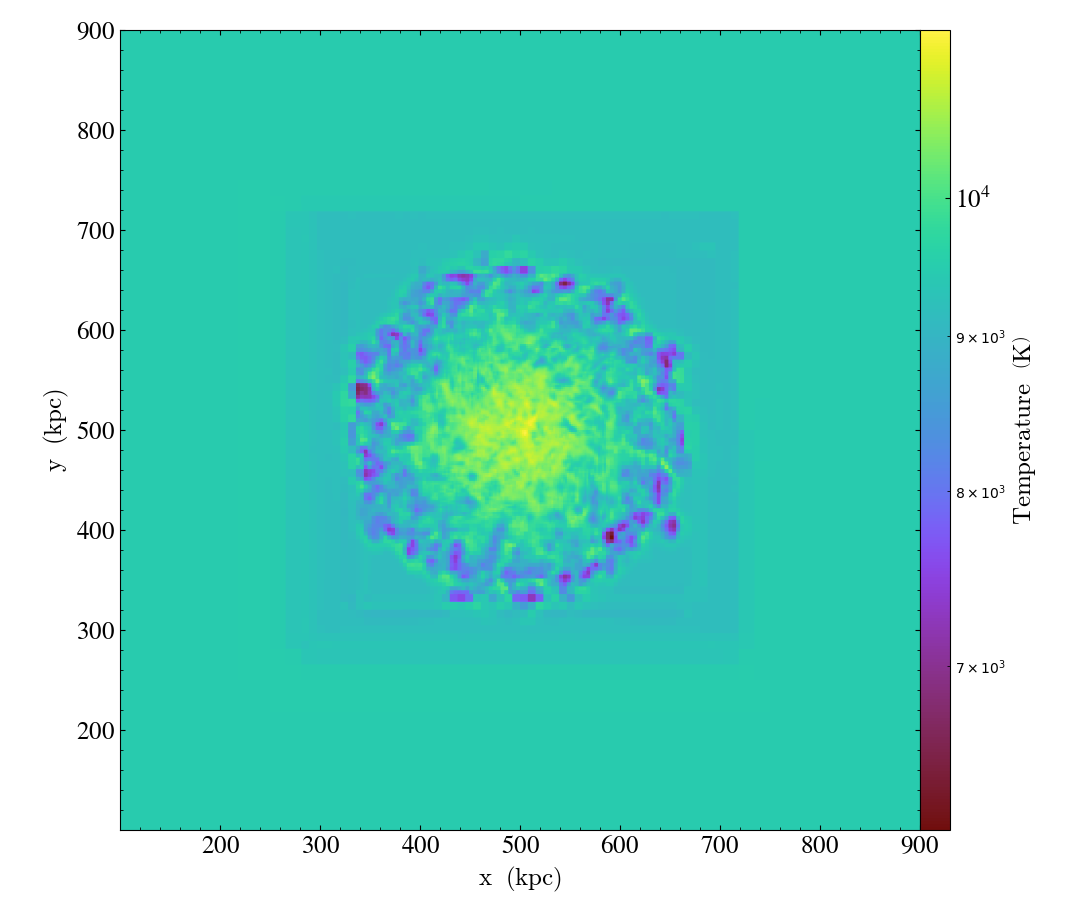

In [19]:
p = ds.r[0.1:0.9, 0.1:0.9, 0.55:0.65].mean("temperature", weight="density", axis="z").plot()

So why is there this blocky structure?  In space, we don't see cubes around galaxies... yet anyway...

This is becuase this is a simulation of a galaxy, not an actual galaxy.  We can show why this might be by plotting the "grids" of this simulation over this thing:


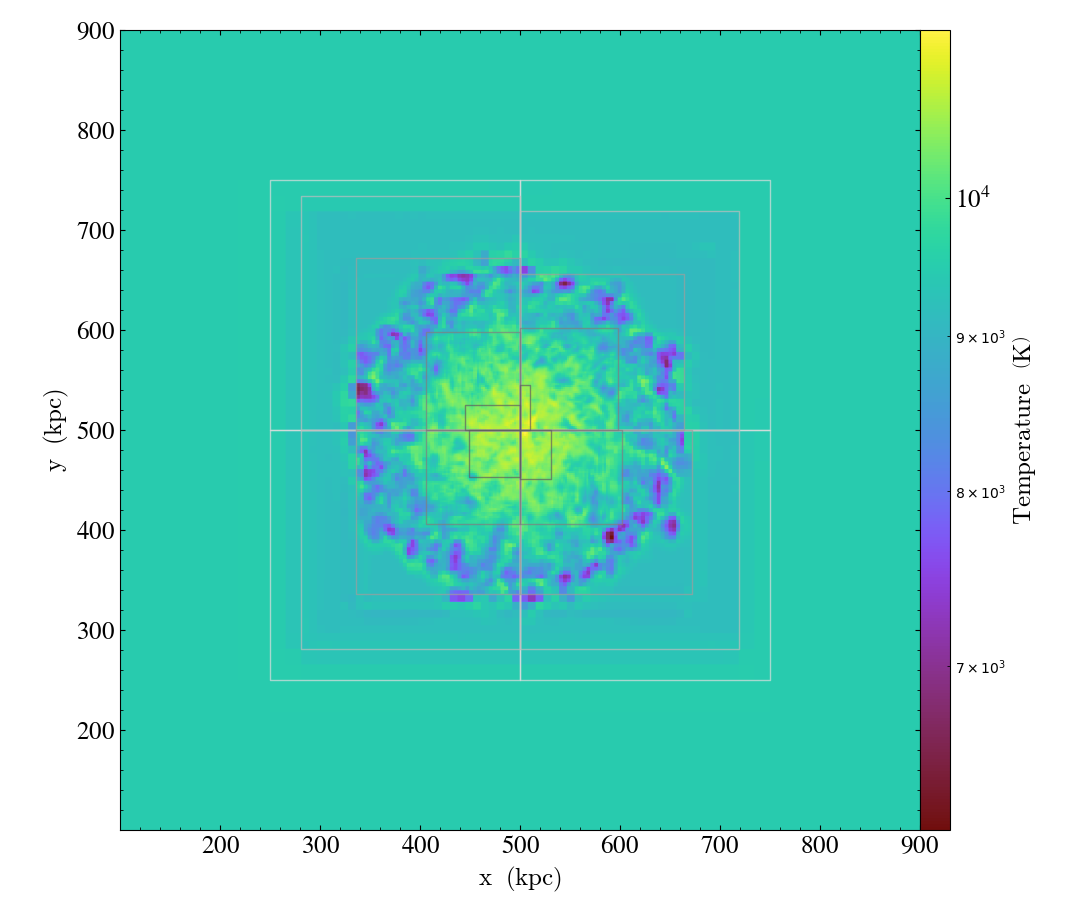

In [20]:
p.annotate_grids()

From this we can see that our grids sort of align where the temperature looks funny.  This is a good indicator that we have some numerical artifacts in our simulation.

Ok!  Let's try some more analysis-like plots some of the helpful yt included plots is:


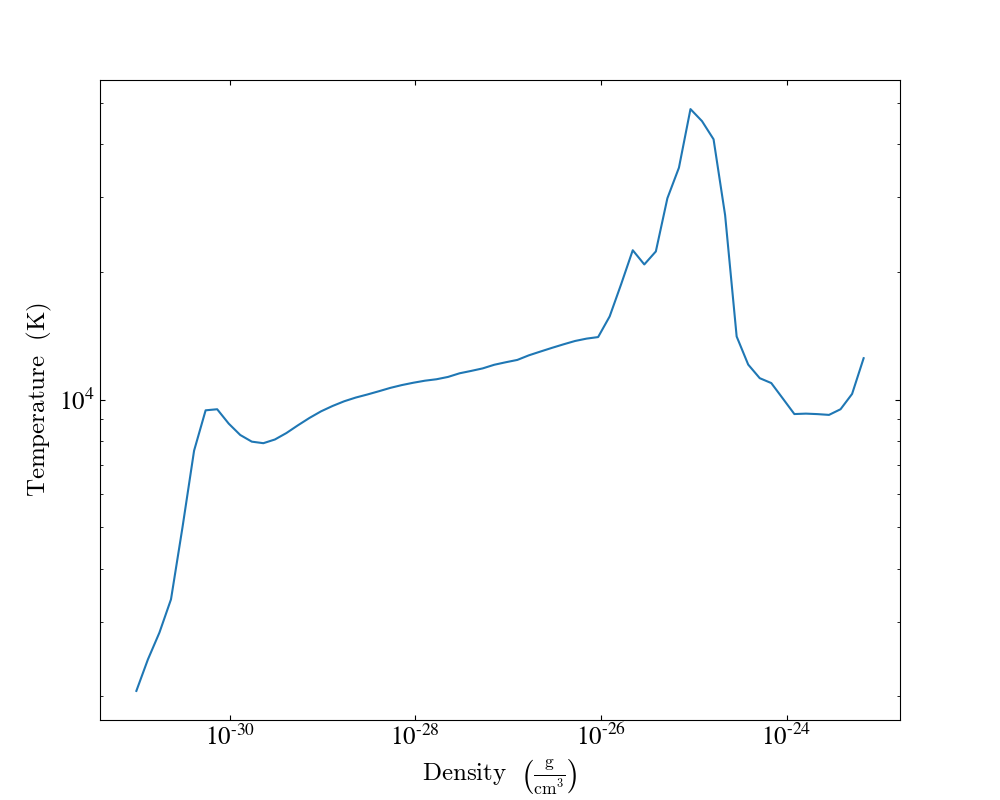

In [21]:
ds.r[:].profile("density", "temperature").plot()

So this is plotting the temperature of the gas in our simulation, in each binned density.

In our actual simulation, we have temperaturates at a variety of densities, and this is usually the case, so by default what is plotted is the temperature (our 2nd param) plotted at each density bin, but weighted by the mass of material (gas) in each cell.

We can weight by other things, like in this case density:


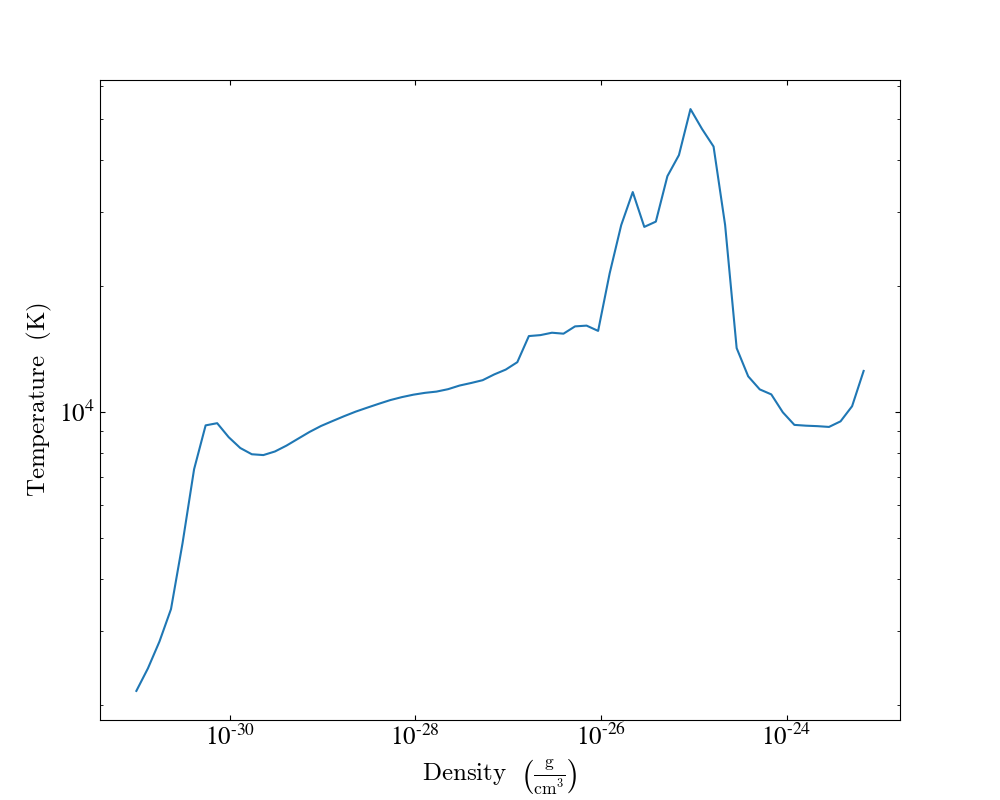

In [22]:
ds.r[:].profile("density", "temperature", weight_field="density").plot()

So, similar shape (since mass and density are related) but a little different.

# Activity #2: Brain data with yt

We can also use yt to play with other sorts of data:

In [23]:
import h5py # might have to pip install

Let's read our datafile into something called "scan_data":

In [26]:
with h5py.File("/Users/jnaiman/Downloads/single_dicom.h5", "r") as f:
    scan_data = f["/scan"][:]

If we recall, we had a weird shape of this data:

In [27]:
scan_data.shape

(36, 512, 512)

So to import this data into yt to have yt make images for us, we need to do some formatting with numpy:

In [28]:
import numpy as np

In [29]:
dsd = yt.load_uniform_grid({'scan': scan_data},
                     [36, 512, 512],
                     #length_unit = yt.units.centimeter, # specify the units of this dataset
                     bbox = np.array([[0., 10], [0, 10], [0, 10]]), # give a "size" to this dataset
)

yt : [INFO     ] 2022-08-17 18:28:56,071 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-08-17 18:28:56,072 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2022-08-17 18:28:56,073 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-17 18:28:56,074 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2022-08-17 18:28:56,075 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-08-17 18:28:57,501 Projection completed
yt : [INFO     ] 2022-08-17 18:28:57,502 xlim = 0.000000 10.000000
yt : [INFO     ] 2022-08-17 18:28:57,503 ylim = 0.000000 10.000000
yt : [INFO     ] 2022-08-17 18:28:57,503 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800



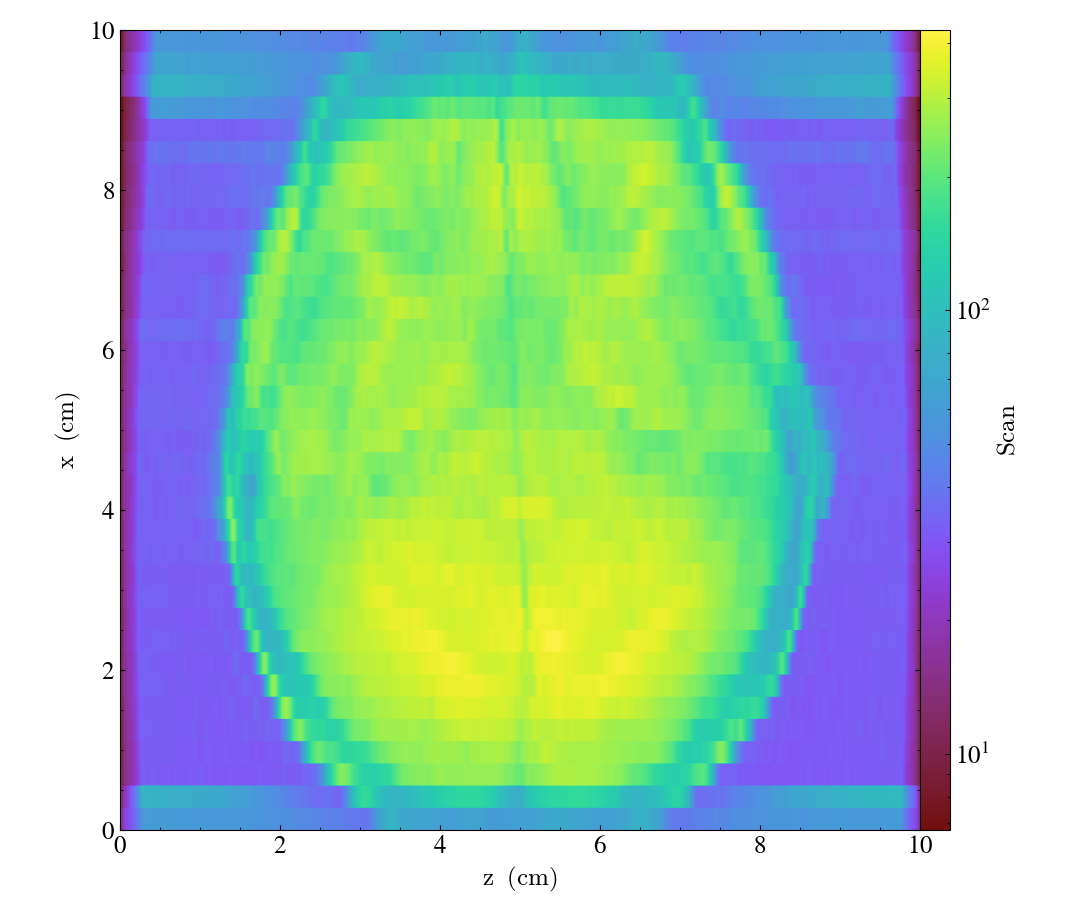

In [30]:
dsd.r[:].mean("scan", axis="y").plot(); # this takes the mean along the specified axis "y" and plots

Can also do .max or .min

Note here that the number of fields available is much less:

In [31]:
dsd.field_list

[('stream', 'scan')]

We can also look at different potions of the z-y axis by specifying the x-axis:

yt : [INFO     ] 2022-08-17 18:28:59,162 xlim = 0.000000 10.000000
yt : [INFO     ] 2022-08-17 18:28:59,162 ylim = 0.000000 10.000000
yt : [INFO     ] 2022-08-17 18:28:59,165 Making a fixed resolution buffer of (scan) 800 by 800
yt : [INFO     ] 2022-08-17 18:28:59,336 Making a fixed resolution buffer of (('stream', 'scan')) 800 by 800
yt : [WARNING  ] 2022-08-17 18:28:59,351 Plotting ('stream', 'scan'): Both positive and negative values. Min = 0.0 dimensionless, Max = 1537.0000000000437 dimensionless.
yt : [WARNING  ] 2022-08-17 18:28:59,351 Switching to symlog colorbar scaling.



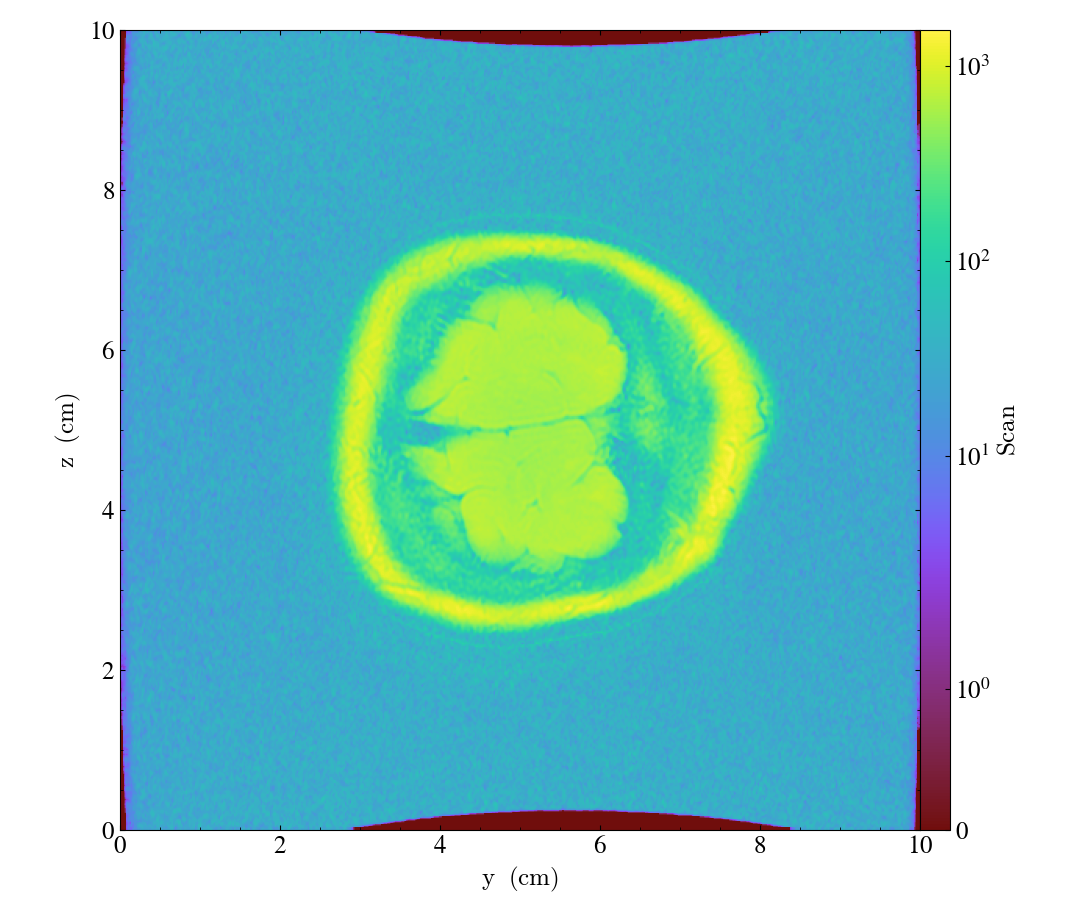

In [32]:
p = dsd.r[0.75,:,:].plot('scan')

# Activity #3: Output images and objects (3D) with yt
Note: we'll do more with 3D objects next week/the last week, but this is a good first view of some cool ways we can output objects with yt.

Let's go back to to our galaxy object and make a surface.

First, we'll cut down to a sphere and check that out:

yt : [INFO     ] 2022-08-17 18:29:00,610 max value is 7.73427e-24 at 0.5040893554687500 0.4998168945312500 0.5001831054687500
yt : [INFO     ] 2022-08-17 18:29:00,834 Projection completed
yt : [INFO     ] 2022-08-17 18:29:00,836 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:29:00,836 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:29:00,837 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



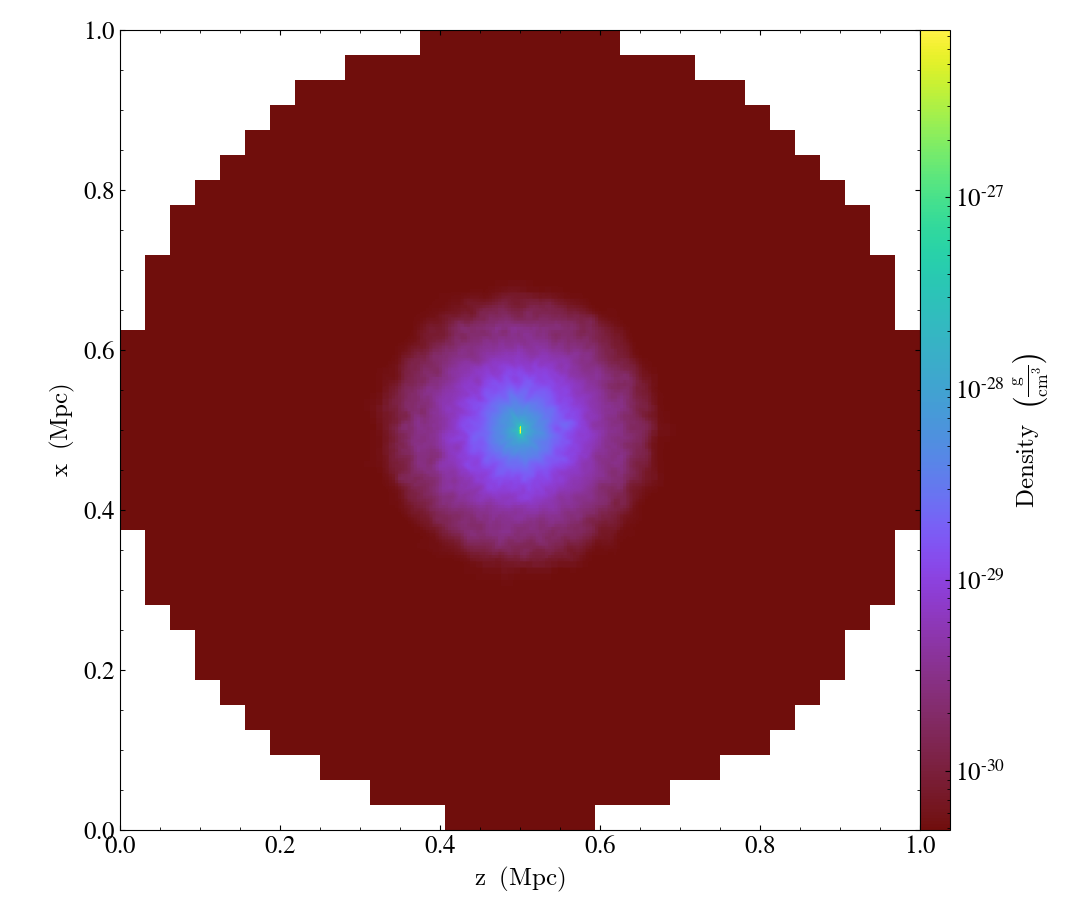

In [33]:
sphere = ds.sphere("max", (500.0, "kpc"))
sphere.mean("density", axis="y").plot(); # this takes the mean along the specified axis "y" and plots

Let's generate a surface of constant density i.e. we'll connect points on a surface where the density has a single value:

In [34]:
surface = ds.surface(sphere, "density", 1e-27)

In [35]:
surface.export_obj('/Users/jnaiman/Downloads/myGalFiles',color_field='temperature')
# the above might take a while

yt : [INFO     ] 2022-08-17 18:29:06,850 Extracting (sampling: ('gas', 'temperature'))


At this point you can upload this to SketchFab, or use PyGEL3D if you were able to install this.

We can also process for 3D printing:

In [36]:
surface.export_obj('/Users/jnaiman/Downloads/myGalFiles_print',dist_fac=0.001)

yt : [INFO     ] 2022-08-17 18:29:45,634 Extracting (sampling: ('gas', 'density'))


## Outputing images for things like clothing

yt : [INFO     ] 2022-08-17 18:30:00,474 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:30:00,476 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:30:00,478 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:30:00,645 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



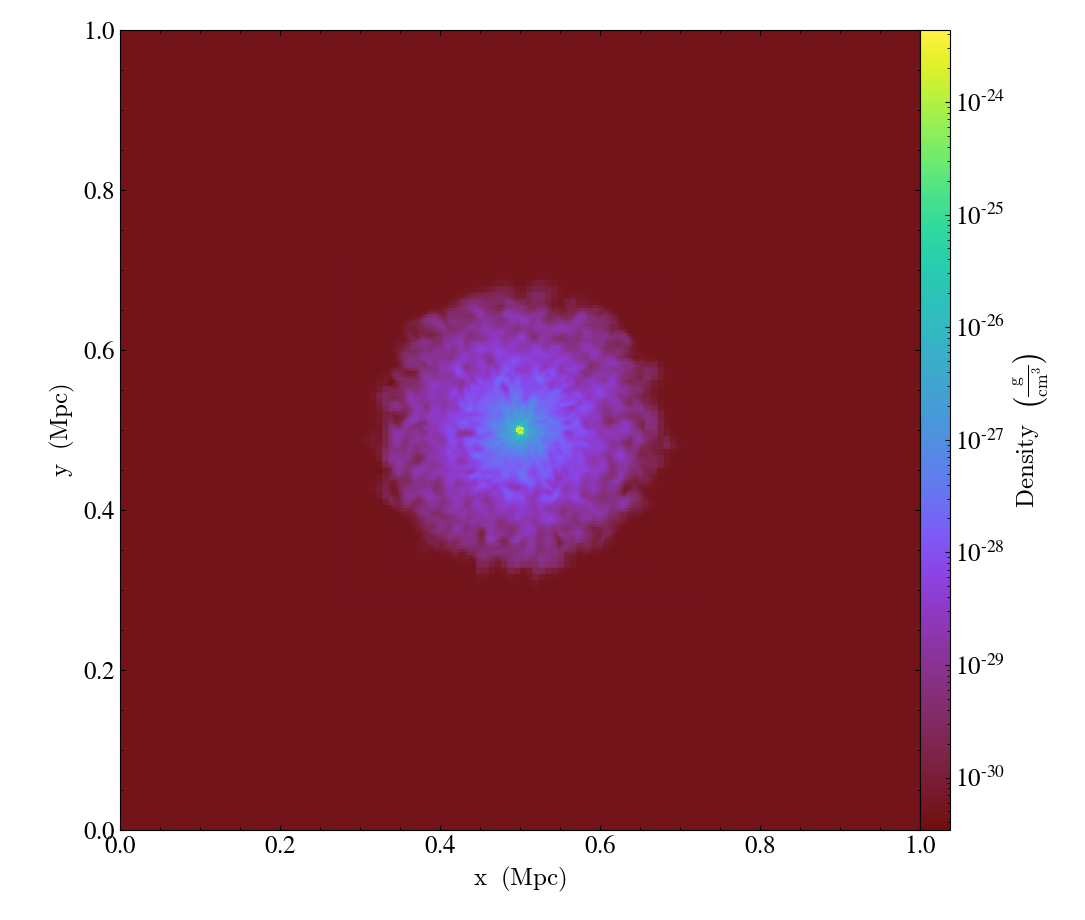

In [37]:
p = ds.r[:, :, 0.5].plot("density")

yt : [INFO     ] 2022-08-17 18:30:00,921 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:30:00,927 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



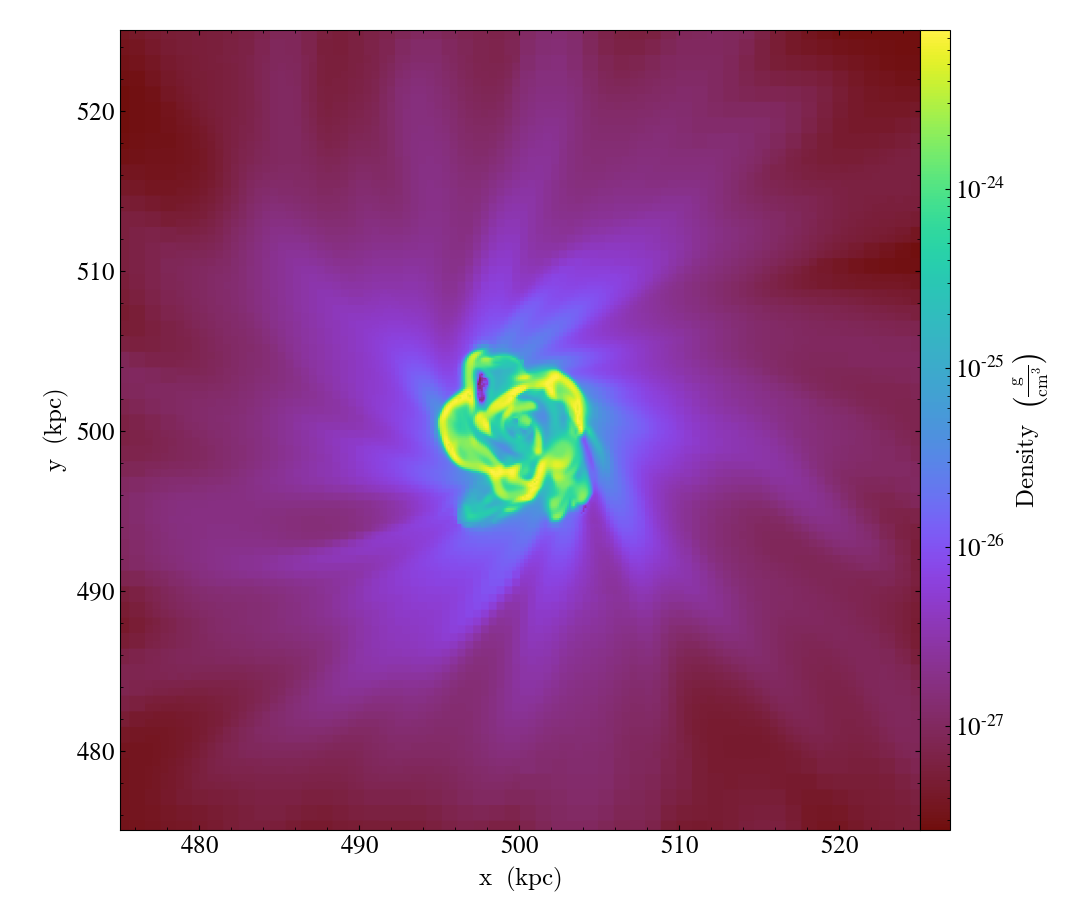

In [38]:
p.zoom(20)

In [39]:
myImage = p.frb # fixed resoltuion binary

We can then grab a simple image array:

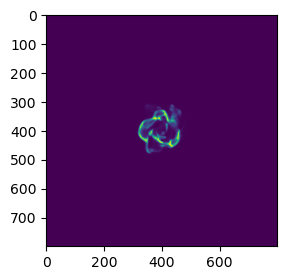

In [40]:
plt.imshow(np.array(myImage['density']))

... or we can turn off labels and grab a lovely image:

yt : [INFO     ] 2022-08-17 18:30:02,690 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:30:02,692 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-08-17 18:30:02,695 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:30:02,739 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



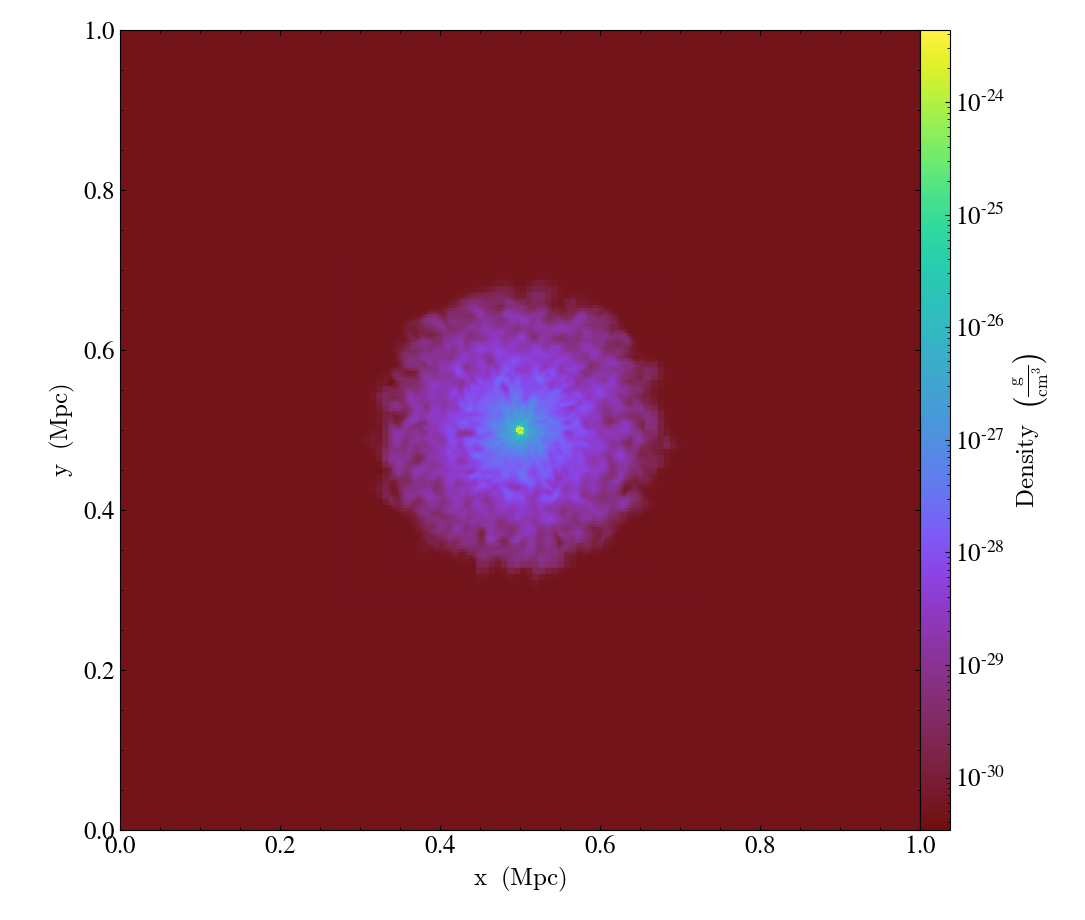

yt : [INFO     ] 2022-08-17 18:30:03,094 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2022-08-17 18:30:03,100 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



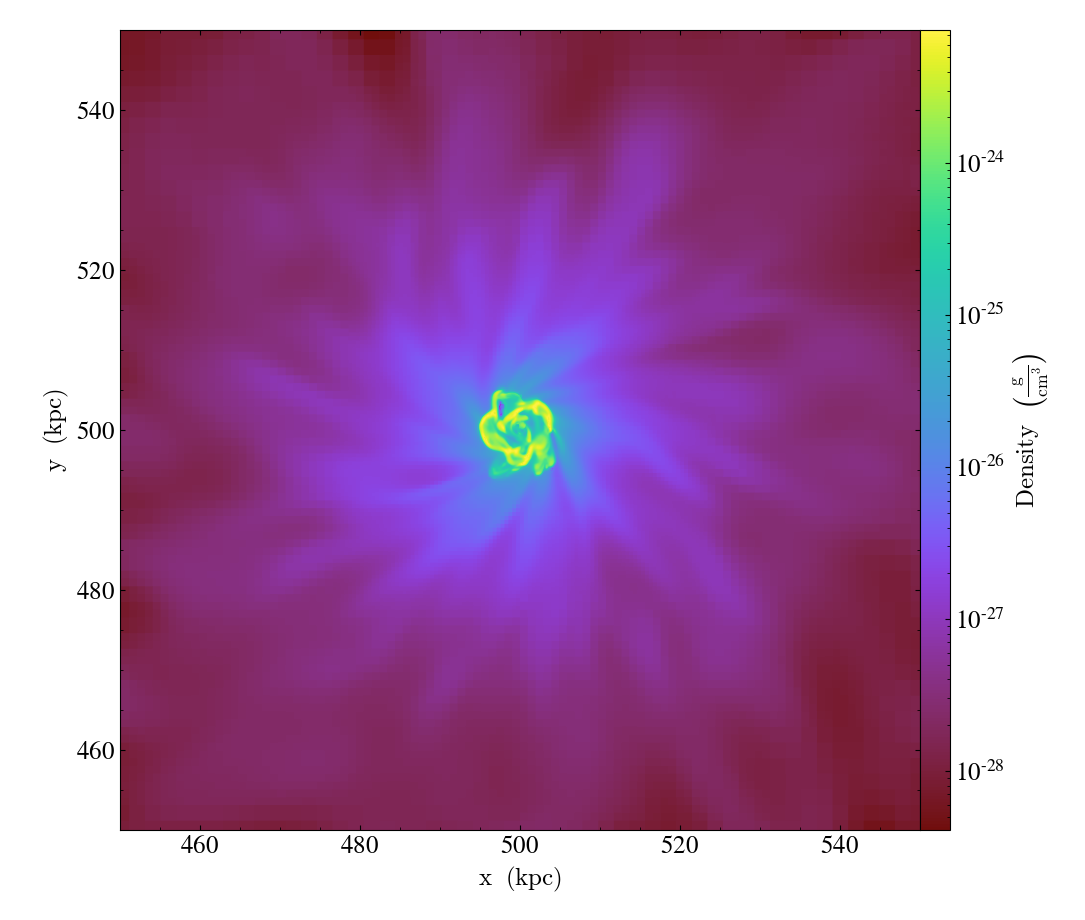

In [41]:
p = ds.r[:, :, 0.5].plot("density")
p.zoom(10)

In [42]:
p.hide_colorbar(); p.hide_axes();


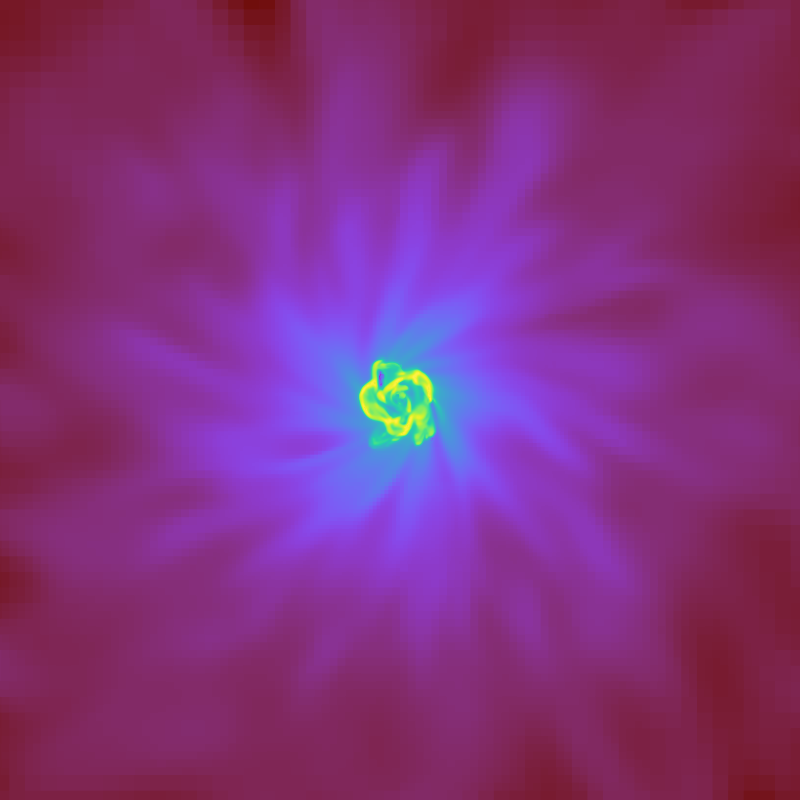

In [43]:
p

Save the image:

In [44]:
p.save('/Users/jnaiman/Downloads/myImage.png')

yt : [INFO     ] 2022-08-17 18:30:04,539 Saving plot /Users/jnaiman/Downloads/myImage.png


['/Users/jnaiman/Downloads/myImage.png']

Now you have a lovely image that you can upload and put on things like sweaters or whatnot.